## EDA: Basic Exploratory Data Analysis
https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
df = pd.read_excel('../BJK_corregido.xlsx')
df

,Sexo,EventID,setNumber,gameNumber,Point,pointNumber,serveNumber,startScore_Server,startScore_Receiver,shotCount,...,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
0,1,DC1,1,1,1,1,1,0,0,2,...,29.048,8.470,-7.625,31.203651,21.263,5.684,6.380,22.915659,8.287992,29.836771
1,1,DC1,1,1,1,2,1,15,0,4,...,33.937,-8.350,-7.607,35.767428,24.944,-5.850,6.801,26.508098,9.259331,33.333590
2,1,DC1,1,1,1,3,1,30,0,2,...,28.541,7.215,-7.183,30.302482,21.009,5.585,7.058,22.855758,7.446724,26.808205
3,1,DC1,1,1,1,4,1,40,0,1,...,23.631,-3.459,-7.389,24.999723,15.163,-3.431,6.906,17.011207,7.988516,28.758658
4,1,DC1,1,2,1,1,1,0,0,4,...,25.859,6.024,-7.745,27.657937,18.158,2.731,6.956,19.635612,8.022325,28.880370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29188,1,DC101,3,9,1,1,1,0,0,2,...,-32.884,-3.610,-7.845,33.999023,-23.728,-2.379,6.608,24.745571,9.253452,33.312428
29189,1,DC101,3,9,1,3,1,15,15,1,...,-27.457,-8.574,-7.641,29.762144,-19.062,-4.510,7.014,20.806156,8.955988,32.241555
29190,1,DC101,3,9,1,4,1,15,30,3,...,-25.192,7.549,-7.957,27.476137,-17.347,6.608,6.992,19.836132,7.640005,27.504018
29191,1,DC101,3,9,1,5,1,15,40,1,...,-29.590,-5.248,-7.684,31.018599,-21.329,-2.954,6.647,22.535194,8.483405,30.540257


In [15]:
df.drop(columns=['Sexo', 'EventID'], inplace=True)

In [16]:
df.describe()

,setNumber,gameNumber,Point,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,...,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
count,29193.000000,29193.000000,29193.0,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,...,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,28665.000000,28286.000000,21615.000000,21615.000000
mean,2.311479,6.132806,1.0,4.141746,1.000171,2.864831,0.290823,1.312609,0.519371,2.069606,...,-0.035221,0.022399,-7.833186,32.964256,-0.030041,0.014209,6.403612,24.671164,8.672808,31.222108
std,1.183707,4.177688,0.0,2.833941,0.013086,2.453197,0.454150,0.463564,0.499633,0.817529,...,31.428890,7.680863,0.630473,4.674563,23.382625,5.692349,1.332627,4.286867,1.698056,6.113002
min,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-45.184000,-15.984000,-10.674000,6.877954,-49.672000,-27.634000,-25.036000,3.363800,-17.917227,-64.502018
25%,1.000000,3.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-31.097000,-6.954000,-8.275000,29.547628,-22.891000,-5.148000,6.119000,21.480336,7.976442,28.715192
50%,2.000000,6.000000,1.0,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,...,18.837000,0.179000,-7.884000,33.115124,12.051000,0.059000,6.530000,24.681019,8.603312,30.971924
75%,3.000000,8.000000,1.0,5.000000,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,...,31.048000,6.978000,-7.399000,36.529200,22.815000,5.170000,6.894000,27.887294,9.268240,33.365665
max,5.000000,46.000000,1.0,27.000000,2.000000,26.000000,1.000000,2.000000,1.000000,3.000000,...,46.920000,16.162000,-2.862000,49.014722,47.529000,21.311000,12.620000,51.399903,33.743996,121.478385


### Explore Data Distributions

Basic Histograms

array([[<AxesSubplot:title={'center':'setNumber'}>,
        <AxesSubplot:title={'center':'gameNumber'}>,
        <AxesSubplot:title={'center':'Point'}>,
        <AxesSubplot:title={'center':'pointNumber'}>,
        <AxesSubplot:title={'center':'serveNumber'}>,
        <AxesSubplot:title={'center':'shotCount'}>],
       [<AxesSubplot:title={'center':'Efectividad'}>,
        <AxesSubplot:title={'center':'1º o 2º saque'}>,
        <AxesSubplot:title={'center':'Lado(1:Iguales;0:Ventaja)'}>,
        <AxesSubplot:title={'center':'DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T'}>,
        <AxesSubplot:title={'center':'V (m/s)'}>,
        <AxesSubplot:title={'center':'V (km/h)'}>],
       [<AxesSubplot:title={'center':'timeHIT'}>,
        <AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'Y1'}>,
        <AxesSubplot:title={'center':'Y1(ABS)'}>,
        <AxesSubplot:title={'center':'Z1 (h)'}>,
        <AxesSubplot:title={'center':'timeNET'}>],
       [<AxesSubplot:title={'cent

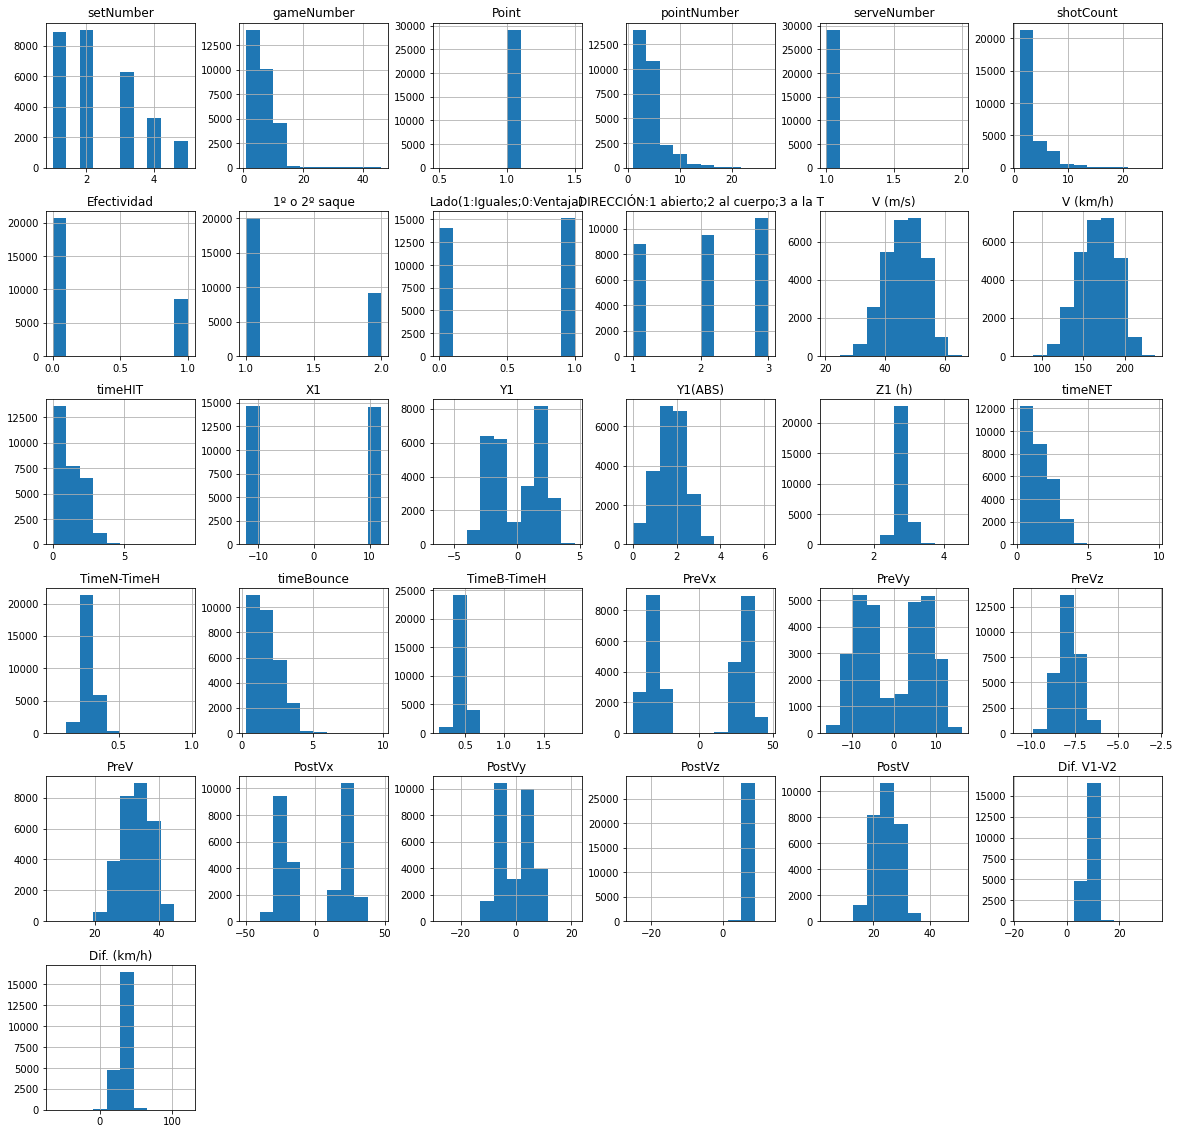

In [42]:
df.hist(figsize = (20,20))

Histograms with population density ~ probability distributions

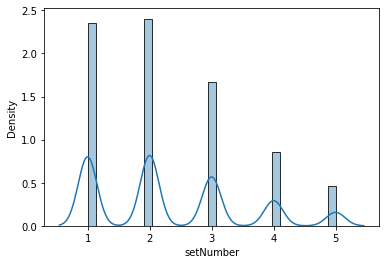

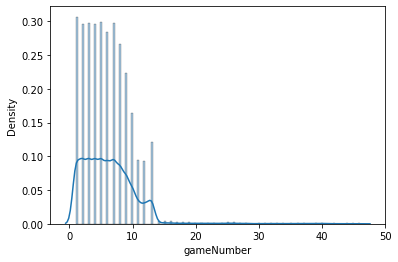

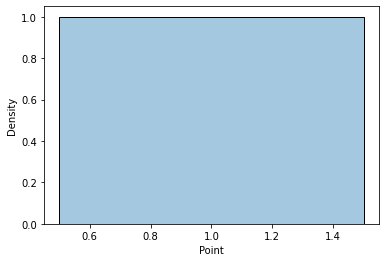

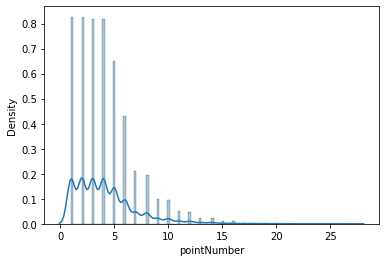

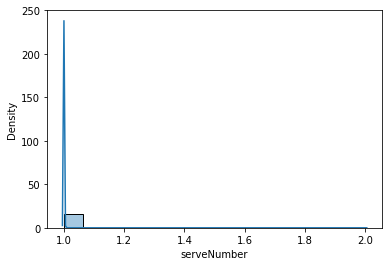

Error in startScore_Server   --->    Unable to parse string "WIN" at position 4059
Error in startScore_Receiver   --->    Unable to parse string "LOS" at position 4059


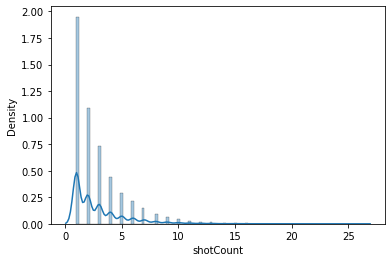

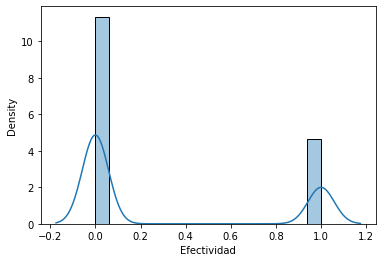

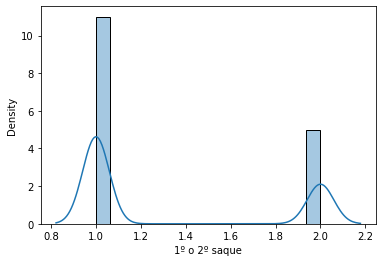

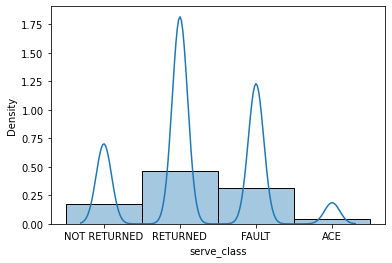

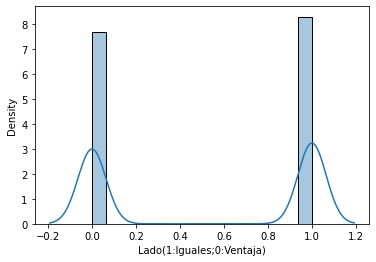

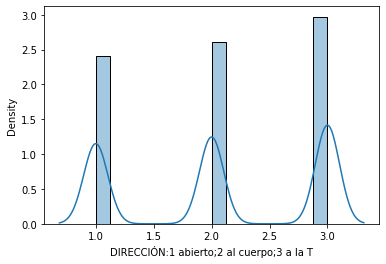

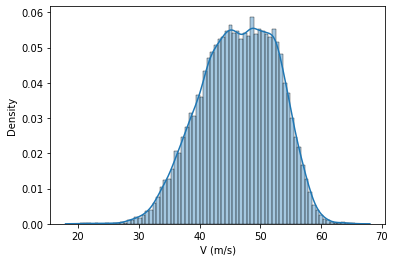

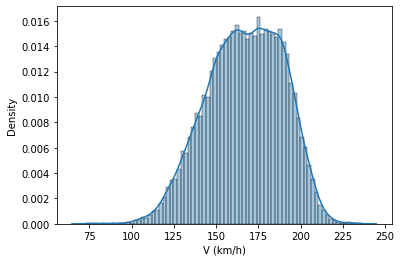

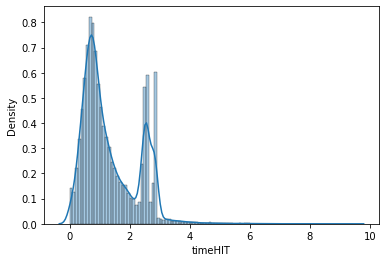

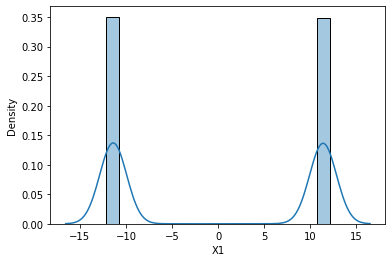

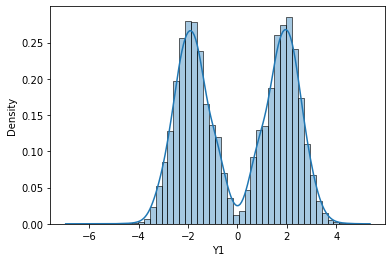

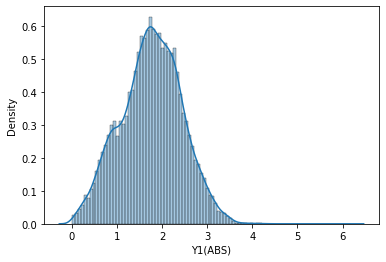

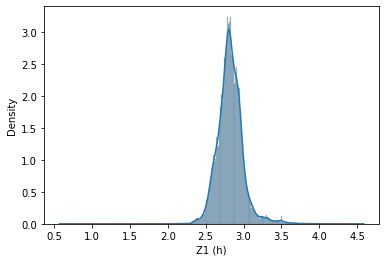

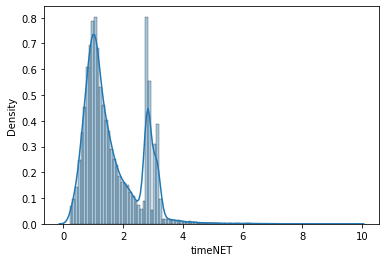

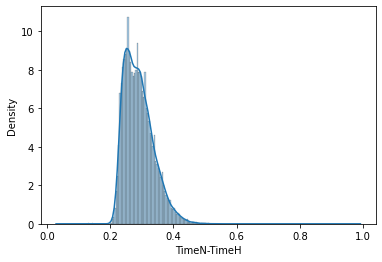

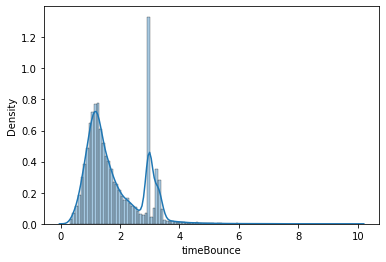

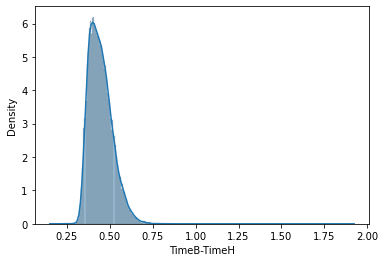

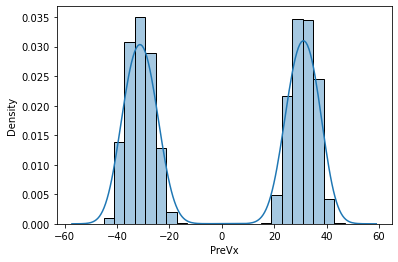

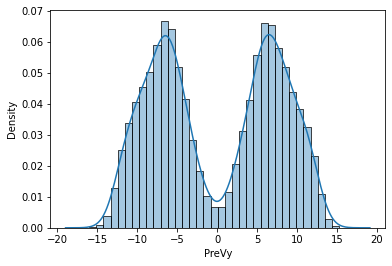

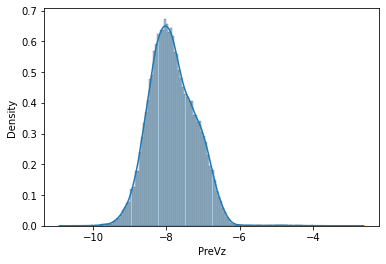

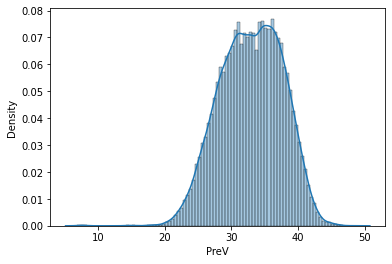

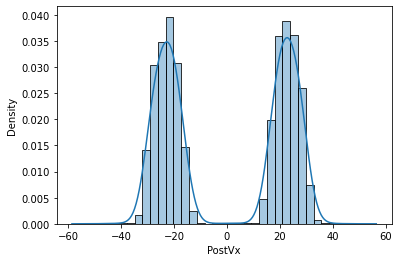

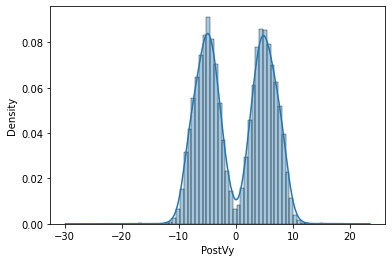

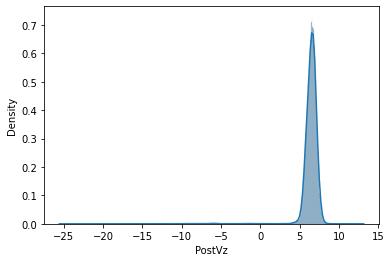

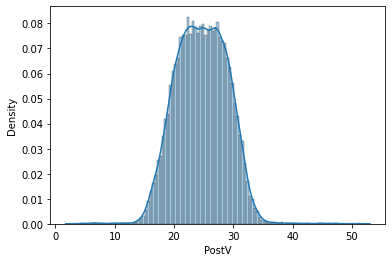

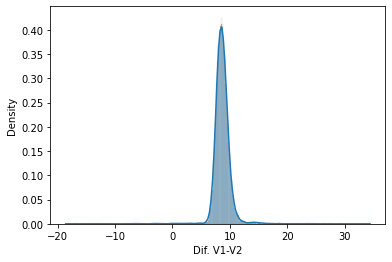

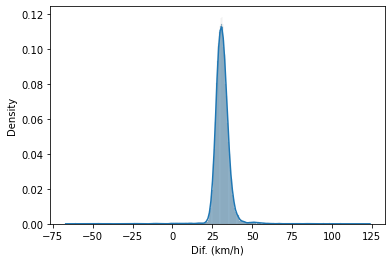

In [56]:
# df.hist(figsize = (16,18))



for c in df.columns:
    try:
        res=sn.histplot(data=df[c], stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})     
        # res = sn.distplot(df[c])
        plt.show()
    except Exception as e:
        print(f"Error in {c}   --->   ", e)


## Some conclusions:
1. We have discrete and continuous variables
2. Continuous vars doesn't always seem to follow a normal distribution
3. We will have to do some feature engineering. These processes might vary depending on the type of algorithm we need to use later
4. Pensaba que el dataset consistía en secuencias, pero me parece que aquí sólo veo servicios (?) Dependiendo de si es un dataset secuencial o no podremos utilizar unos u otros algoritmos